In [65]:
import pandas as pd
import numpy as np
% matplotlib inline

##### 1.Load Data→import to a DataFrame #####

In [66]:
df_train = pd.read_csv("../data/train.csv")

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### 2.Visualize the Data #####

In [68]:
df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [69]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Text(0,0.5,'Number')

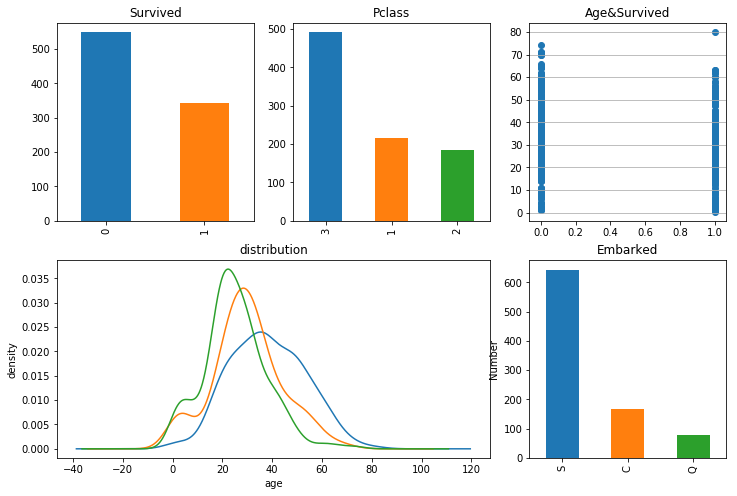

In [70]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(12,8))

#Survived
plt.subplot2grid((2,3),(0,0))
df_train['Survived'].value_counts().plot(kind="bar")
plt.title("Survived")

#Pclass
plt.subplot2grid((2,3),(0,1))
df_train['Pclass'].value_counts().plot(kind="bar")
plt.title("Pclass")

#Age&Survived
plt.subplot2grid((2,3),(0,2))
plt.scatter(df_train.Survived, df_train.Age)
plt.grid(b=True, which='major', axis='y')
plt.title("Age&Survived")

#Age
plt.subplot2grid((2,3),(1,0), colspan=2)
df_train.Age[df_train.Pclass==1].plot(kind="kde")
df_train.Age[df_train.Pclass==2].plot(kind="kde")
df_train.Age[df_train.Pclass==3].plot(kind="kde")
plt.xlabel("age")
plt.ylabel("density") 
plt.title("distribution")

plt.subplot2grid((2,3),(1,2))
df_train.Embarked.value_counts().plot(kind='bar')
plt.title("Embarked")
plt.ylabel("Number")  

<Figure size 432x288 with 0 Axes>

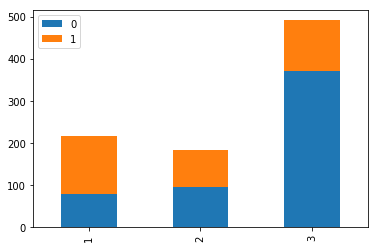

In [71]:
fig2 = plt.figure()
survived_0 = df_train.Pclass[df_train.Survived==0].value_counts()
survived_1 = df_train.Pclass[df_train.Survived==1].value_counts()
df_survived=pd.DataFrame({'1':survived_1, '0':survived_0})
df_survived.plot(kind="bar", stacked=True)

<Figure size 432x288 with 0 Axes>

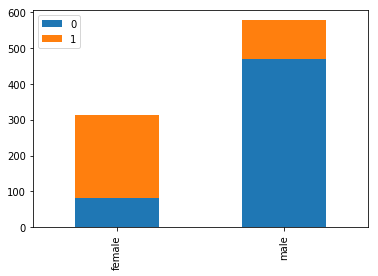

In [72]:
fig3 = plt.figure()
survived_sex_0 = df_train.Sex[df_train.Survived==0].value_counts()
survived_sex_1 = df_train.Sex[df_train.Survived==1].value_counts()
df_sex_survived=pd.DataFrame({'1':survived_sex_1, '0':survived_sex_0})
df_sex_survived.plot(kind="bar", stacked=True)

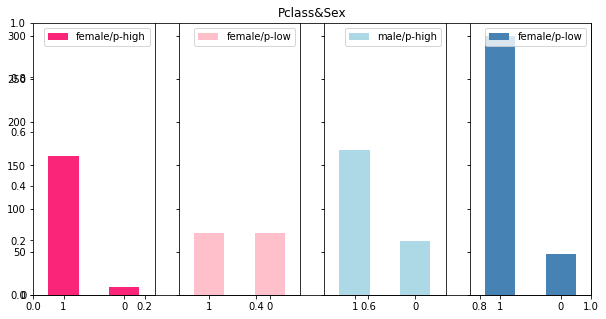

In [73]:
fig4=plt.figure(figsize=(10,5))
plt.title("Pclass&Sex")

ax1=fig4.add_subplot(141)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(["1", "0"], rotation=0)
ax1.legend(["female/p-high"], loc='best')

ax2=fig4.add_subplot(142, sharey=ax1)
df_train.Survived[df_train.Sex == 'female'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(["1", "0"], rotation=0)
plt.legend(["female/p-low"], loc='best')

ax3=fig4.add_subplot(143, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(["1", "0"], rotation=0)
plt.legend(["male/p-high"], loc='best')

ax4=fig4.add_subplot(144, sharey=ax1)
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(["1", "0"], rotation=0)
plt.legend(["female/p-low"], loc='best')

plt.show()

In [74]:
df_train.Survived[df_train.Sex == 'male'][df_train.Pclass == 3].value_counts()

0    300
1     47
Name: Survived, dtype: int64

<Figure size 432x288 with 0 Axes>

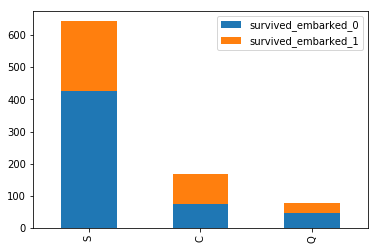

In [75]:
fig4 = plt.figure()

survived_embarked_0 = df_train.Embarked[df_train.Survived==0].value_counts()
survived_embarked_1 = df_train.Embarked[df_train.Survived==1].value_counts()

df_survived_embarked = pd.DataFrame({'survived_embarked_0':survived_embarked_0,'survived_embarked_1':survived_embarked_1})
df_survived_embarked.plot(kind="bar",stacked=True)

In [76]:
g= df_train.groupby(['SibSp','Survived'])
g.count()['PassengerId']

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

In [77]:
g= df_train.groupby(['Parch','Survived'])
g.count()['PassengerId']

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64

<Figure size 432x288 with 0 Axes>

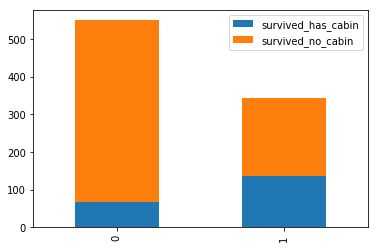

In [78]:
fig5 = plt.figure()
survived_no_cabin = df_train.Survived[pd.isnull(df_train.Cabin)].value_counts()
survived_has_cabin = df_train.Survived[pd.notnull(df_train.Cabin)].value_counts()

df_cabin_survived = pd.DataFrame({'survived_no_cabin':survived_no_cabin,'survived_has_cabin':survived_has_cabin})
df_cabin_survived.plot.bar(stacked=True)

##### 3.Cleanup and Transform the Data(feature engineering) #####

In [86]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_age(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    #  df.values　→ Return a Numpy representation of the DataFrame.(version 0.23: to_numpy() is recommended)
    #  print(age_df.values)
    # df.as_matrix()→ 将frame转换为它的数字数组表示形式(version 0.23.0: Use DataFrame.values() instead.)
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    # y即目标年龄（第1列 age）
    y = known_age[:, 0]
    # X即特征属性值（第2列开始的其他列）
    X = known_age[:, 1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df,rfr

def set_cabin_type(df):
    #找出notnull或isnull的行，在cabin列上设值yes或no
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df

In [87]:
df_train,rfr= set_missing_age(df_train)
df_train = set_cabin_type(df_train)

In [88]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
5                                     Moran, Mr. James    male  23.838953   
6                              McCarthy, Mr. Timothy J    male  54.000000   
7                       Palsson, Master. Gosta Leonard    male   2.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                     Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                            Bonnell, Miss. Elizabeth  female  58.000000   
12                      Saundercock, Mr. William Henry    male  20.000000   
13                         Andersson, Mr. Anders Johan    male  39.000000   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                                Rice, Master. Eugene    male   2.000000   
17                        Williams, Mr. Charles Eugene    male  32.066493   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                             Masselmani, Mrs. Fatima  female  29.518205   
20                             

In [89]:
dummy_cabin = pd.get_dummies(df_train.Cabin, prefix="cabin")

In [91]:
df_train.Cabin.value_counts()

Yes    891
Name: Cabin, dtype: int64